In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [110]:
Folder_JB = 'J.Full_year_operational_cost/Results/B.Operation_cost'
Folder_JD = 'J.Full_year_operational_cost/Results/D.Representative_days_based_on_RES_and_Demand'
Folder_JE = 'J.Full_year_operational_cost/Results/E.Representative_days_based_on_Line_Benefits_OptModel'
Folder_JK = 'J.Full_year_operational_cost/Results/K.Investments_per_hour'
Folder_JL = 'J.Full_year_operational_cost/Results/L.Cont_Investments_per_hour'

# Folder_JB = 'J.Full_year_operational_cost/Results/B'
# Folder_JD = 'J.Full_year_operational_cost/Results/D'
# Folder_JE = 'J.Full_year_operational_cost/Results/E'
# Folder_JK = 'J.Full_year_operational_cost/Results/K'
# Folder_JL = 'J.Full_year_operational_cost/Results/L'

Folder_B = "B.Operation_cost"
DirName  = os.getcwd()
category_dict = {
                 Folder_B: "OPC",
                 Folder_JB: "OPC_fy",
                 Folder_JD: "R&D_fy",
                 Folder_JE: "OPT_LB_fy",
                 Folder_JK: "HI_fy",
                 Folder_JL: "CHI_fy"
                }

In [111]:
def LoadingData(dir, folder,result, case, ncluster, cm):
    if folder == 'A.The_full_year_MILP': 
        df = pd.read_csv(os.path.join( folder, case, '3.Out', f'oT_Result_{result}_'+case+'.csv'), index_col=[0,1])
    else: 
        #df = pd.read_csv(os.path.join( folder, case+'_ByStages_nc'+str(ncluster), '3.Out', f'oT_Result_{result}_'+case+ '_ByStages_nc'+str(ncluster)+'.csv'), index_col=[0,1])
        df = pd.read_csv(f"{folder}/{case}_Bystages_nc{ncluster}/3.out/oT_Result_{result}_{case}_Bystages_nc{ncluster}.csv",index_col=[0,1])
    df['CaseName'] = folder + ' - ' + case + str(ncluster)
    df['Case'] = case
    df['Clustering method'] = cm
    df['Number of clusters'] = ncluster
    df = df.reset_index()
    if result == "CostSummary":
        df["Cost/Payment"] = df["Cost/Payment"].str.replace(" ","")
    print(f"{folder}/{case}_Bystages_nc{ncluster}/3.out/oT_Result_{result}_{case}_Bystages_nc{ncluster}.csv")
    return df

In [147]:
df_all = pd.DataFrame()

cases = ["IEEE118","IEEE118_mod1","IEEE118_mod2"]
cases = ["IEEE118_mod1"]
#cases = ["IEEE118"]#,"IEEE118_mod1","IEEE118_mod2"]
folders = [Folder_JB,Folder_JD,Folder_JE,Folder_JK,Folder_JL]
nbcs = [10,20,30,40,50,60,70,80,90,100]#,110,120,130,140,150]

for case in cases: 
    for nbc in nbcs:
        for folder in folders: 
            df = LoadingData(DirName,folder,"NetworkInvestment",case,nbc,category_dict[folder])
            df_all = pd.concat([df_all,df])


J.Full_year_operational_cost/Results/B.Operation_cost/IEEE118_mod1_Bystages_nc10/3.out/oT_Result_NetworkInvestment_IEEE118_mod1_Bystages_nc10.csv
J.Full_year_operational_cost/Results/D.Representative_days_based_on_RES_and_Demand/IEEE118_mod1_Bystages_nc10/3.out/oT_Result_NetworkInvestment_IEEE118_mod1_Bystages_nc10.csv
J.Full_year_operational_cost/Results/E.Representative_days_based_on_Line_Benefits_OptModel/IEEE118_mod1_Bystages_nc10/3.out/oT_Result_NetworkInvestment_IEEE118_mod1_Bystages_nc10.csv
J.Full_year_operational_cost/Results/K.Investments_per_hour/IEEE118_mod1_Bystages_nc10/3.out/oT_Result_NetworkInvestment_IEEE118_mod1_Bystages_nc10.csv
J.Full_year_operational_cost/Results/L.Cont_Investments_per_hour/IEEE118_mod1_Bystages_nc10/3.out/oT_Result_NetworkInvestment_IEEE118_mod1_Bystages_nc10.csv
J.Full_year_operational_cost/Results/B.Operation_cost/IEEE118_mod1_Bystages_nc20/3.out/oT_Result_NetworkInvestment_IEEE118_mod1_Bystages_nc20.csv
J.Full_year_operational_cost/Results/D.Re

In [148]:
df_all['Nodes'] = df_all['InitialNode'].astype(str) + " - " + df_all['FinalNode'].astype(str)
df_all['p.u.'] = df_all['p.u.'].astype(int)
df_all

,Period,InitialNode,FinalNode,Circuit,p.u.,CaseName,Case,Clustering method,Number of clusters,Nodes
0,2030,bus077,bus082,cac1,0,J.Full_year_operational_cost/Results/B.Operati...,IEEE118_mod1,OPC_fy,10,bus077 - bus082
1,2030,bus012,bus016,cac1,0,J.Full_year_operational_cost/Results/B.Operati...,IEEE118_mod1,OPC_fy,10,bus012 - bus016
2,2030,bus007,bus012,cac1,0,J.Full_year_operational_cost/Results/B.Operati...,IEEE118_mod1,OPC_fy,10,bus007 - bus012
3,2030,bus033,bus037,cac1,0,J.Full_year_operational_cost/Results/B.Operati...,IEEE118_mod1,OPC_fy,10,bus033 - bus037
4,2030,bus065,bus068,cac1,1,J.Full_year_operational_cost/Results/B.Operati...,IEEE118_mod1,OPC_fy,10,bus065 - bus068
...,...,...,...,...,...,...,...,...,...,...
29,2030,bus068,bus069,cac1,1,J.Full_year_operational_cost/Results/L.Cont_In...,IEEE118_mod1,CHI_fy,100,bus068 - bus069
30,2030,bus093,bus094,cac1,1,J.Full_year_operational_cost/Results/L.Cont_In...,IEEE118_mod1,CHI_fy,100,bus093 - bus094
31,2030,bus080,bus099,cac1,1,J.Full_year_operational_cost/Results/L.Cont_In...,IEEE118_mod1,CHI_fy,100,bus080 - bus099
32,2030,bus094,bus100,cac1,1,J.Full_year_operational_cost/Results/L.Cont_In...,IEEE118_mod1,CHI_fy,100,bus094 - bus100


In [172]:
df_pivot = df_all.pivot_table(
    index=["Nodes","Circuit"], 
    columns=["Clustering method","Case"], 
    values="p.u.", 
    aggfunc="sum"  # Custom function to count values greater than 0
)
#df_pivot = df_pivot[~(df_pivot == 1).all(axis=1)] 
#df_pivot = df_pivot[~(df_pivot == 0).all(axis=1)] 
df_pivot

,Clustering method,CHI_fy,HI_fy,OPC_fy,OPT_LB_fy,R&D_fy
,Case,IEEE118_mod1,IEEE118_mod1,IEEE118_mod1,IEEE118_mod1,IEEE118_mod1
Nodes,Circuit,,,,,
bus003 - bus005,cac1,6,9,8,7,10
bus004 - bus011,cac1,0,0,0,0,0
bus005 - bus006,cac1,8,5,10,1,10
bus006 - bus007,cac1,0,0,0,0,0
bus007 - bus012,cac1,0,0,0,0,0
bus008 - bus005,cac1,10,10,10,10,10
bus008 - bus030,cac1,10,10,10,9,10
bus011 - bus012,cac1,1,3,1,0,0


In [173]:
df_pivot_ = df_pivot.reset_index(drop=True)
df_centered = df_pivot_.subtract(df_pivot_.mean(axis=1), axis=0)

In [174]:
df_pivot.mean(axis=1).shape

(34,)

In [176]:
df_pivot[(df_pivot.mean(axis=1) != 10) & df_pivot.sum(axis=1)!=0].shape

(9, 5)

(14, 5)


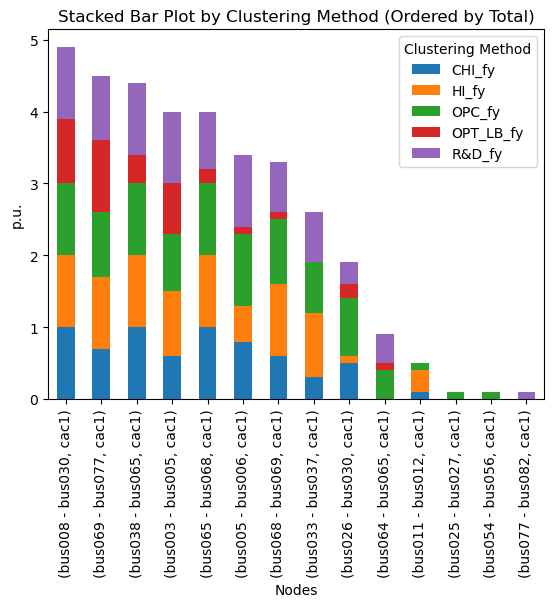

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

filtered = True
# Pivot the dataframe to reshape it for stacked bar plotting
df_pivot = df_all.pivot_table(index=['Nodes',"Circuit"], columns='Clustering method', values='p.u.',aggfunc="mean")

if filtered: 
    df_pivot = df_pivot[(df_pivot.mean(axis=1) != 1) & df_pivot.sum(axis=1)!=0]
    print(df_pivot.shape)
#df_pivot = df_all.pivot_table(index='Clustering method', columns=['Nodes',"Circuit"], values='p.u.')

# Calculate the total sum for each Node across all Clustering methods
df_pivot['Total'] = df_pivot.sum(axis=1)

# Sort by the total sum in descending order
df_pivot_sorted = df_pivot.sort_values('Total', ascending=False)

# Drop the 'Total' column after sorting (we don't want to plot this)
df_pivot_sorted = df_pivot_sorted.drop(columns='Total')

# Plot stacked bars using Matplotlib
df_pivot_sorted.plot(kind='bar', stacked=True)

plt.xlabel('Nodes')
plt.ylabel('p.u.')
plt.title('Stacked Bar Plot by Clustering Method (Ordered by Total)')
plt.legend(title='Clustering Method')
plt.show()



In [13]:
df_centered.corr()

Clustering method                 CHI_fy                               HI_fy   
Case                             IEEE118 IEEE118_mod1 IEEE118_mod2   IEEE118   
Clustering method Case                                                         
CHI_fy            IEEE118       1.000000    -0.654415    -0.332222  0.988448  \
                  IEEE118_mod1 -0.654415     1.000000     0.559635 -0.622291   
                  IEEE118_mod2 -0.332222     0.559635     1.000000 -0.348798   
HI_fy             IEEE118       0.988448    -0.622291    -0.348798  1.000000   
                  IEEE118_mod1 -0.269571     0.052921    -0.195717 -0.302568   
                  IEEE118_mod2 -0.332338     0.646910     0.110932 -0.305541   
OPC_fy            IEEE118       0.735388    -0.657247    -0.364585  0.732841   
                  IEEE118_mod1 -0.587784     0.554541     0.512068 -0.598400   
                  IEEE118_mod2 -0.718738     0.604419     0.480362 -0.721394   
OPT_LB_fy         IEEE118       0.667769    -0.665355    -0.421305  0.661982   
                  IEEE118_mod1 -0.692665     0.231587    -0.077397 -0.675168   
                  IEEE118_mod2 -0.672119     0.222944     0.015492 -0.654413   
R&D_fy            IEEE118       0.855099    -0.683801    -0.537375  0.845682   
                  IEEE118_mod1 -0.448617     0.218117    -0.097260 -0.462249   
                  IEEE118_mod2 -0.787589     0.767954     0.561446 -0.786975   

Clustering method                                           OPC_fy   
Case                           IEEE118_mod1 IEEE118_mod2   IEEE118   
Clustering method Case                                               
CHI_fy            IEEE118         -0.269571    -0.332338  0.735388  \
                  IEEE118_mod1     0.052921     0.646910 -0.657247   
                  IEEE118_mod2    -0.195717     0.110932 -0.364585   
HI_fy             IEEE118         -0.302568    -0.305541  0.732841   
                  IEEE118_mod1     1.000000     0.349493 -0.328908   
                  IEEE118_mod2     0.349493     1.000000 -0.391364   
OPC_fy            IEEE118         -0.328908    -0.391364  1.000000   
                  IEEE118_mod1     0.147185     0.060407 -0.597209   
                  IEEE118_mod2     0.233234     0.252263 -0.779679   
OPT_LB_fy         IEEE118         -0.249935    -0.465750  0.885113   
                  IEEE118_mod1     0.051622     0.188535 -0.532677   
                  IEEE118_mod2    -0.042627     0.158929 -0.533179   
R&D_fy            IEEE118         -0.041672    -0.489541  0.601211   
                  IEEE118_mod1     0.275732     0.097979 -0.524529   
                  IEEE118_mod2     0.143466     0.247975 -0.752957   

Clustering method                                        OPT_LB_fy   
Case                           IEEE118_mod1 IEEE118_mod2   IEEE118   
Clustering method Case                                               
CHI_fy            IEEE118         -0.587784    -0.718738  0.667769  \
                  IEEE118_mod1     0.554541     0.604419 -0.665355   
                  IEEE118_mod2     0.512068     0.480362 -0.421305   
HI_fy             IEEE118         -0.598400    -0.721394  0.661982   
                  IEEE118_mod1     0.147185     0.233234 -0.249935   
                  IEEE118_mod2     0.060407     0.252263 -0.465750   
OPC_fy            IEEE118         -0.597209    -0.779679  0.885113   
                  IEEE118_mod1     1.000000     0.862426 -0.534144   
                  IEEE118_mod2     0.862426     1.000000 -0.692591   
OPT_LB_fy         IEEE118         -0.534144    -0.692591  1.000000   
                  IEEE118_mod1    -0.005184     0.271301 -0.538662   
                  IEEE118_mod2     0.023613     0.290315 -0.547625   
R&D_fy            IEEE118         -0.573466    -0.701524  0.622247   
                  IEEE118_mod1     0.597740     0.463889 -0.459543   
                  IEEE118_mod2     0.605996     0.635989 -0.703284   

Clustering method                    

In [14]:
df_pivot.corr()

Clustering method                 CHI_fy                               HI_fy   
Case                             IEEE118 IEEE118_mod1 IEEE118_mod2   IEEE118   
Clustering method Case                                                         
CHI_fy            IEEE118       1.000000     0.709665     0.670641  0.996981  \
                  IEEE118_mod1  0.709665     1.000000     0.915711  0.720020   
                  IEEE118_mod2  0.670641     0.915711     1.000000  0.670933   
HI_fy             IEEE118       0.996981     0.720020     0.670933  1.000000   
                  IEEE118_mod1  0.740849     0.884484     0.775493  0.739032   
                  IEEE118_mod2  0.779923     0.968360     0.855193  0.788115   
OPC_fy            IEEE118       0.916170     0.628513     0.582268  0.915259   
                  IEEE118_mod1  0.683524     0.944805     0.902767  0.686674   
                  IEEE118_mod2  0.586950     0.929539     0.877666  0.591924   
OPT_LB_fy         IEEE118       0.895546     0.613881     0.549599  0.893600   
                  IEEE118_mod1  0.409655     0.765006     0.614577  0.421522   
                  IEEE118_mod2  0.405269     0.753303     0.638656  0.417193   
R&D_fy            IEEE118       0.963605     0.769875     0.685805  0.962856   
                  IEEE118_mod1  0.739417     0.920460     0.813008  0.742025   
                  IEEE118_mod2  0.626714     0.967744     0.907833  0.632525   

Clustering method                                           OPC_fy   
Case                           IEEE118_mod1 IEEE118_mod2   IEEE118   
Clustering method Case                                               
CHI_fy            IEEE118          0.740849     0.779923  0.916170  \
                  IEEE118_mod1     0.884484     0.968360  0.628513   
                  IEEE118_mod2     0.775493     0.855193  0.582268   
HI_fy             IEEE118          0.739032     0.788115  0.915259   
                  IEEE118_mod1     1.000000     0.926518  0.663341   
                  IEEE118_mod2     0.926518     1.000000  0.700129   
OPC_fy            IEEE118          0.663341     0.700129  1.000000   
                  IEEE118_mod1     0.879514     0.896834  0.598805   
                  IEEE118_mod2     0.865665     0.882729  0.468826   
OPT_LB_fy         IEEE118          0.673639     0.676263  0.957194   
                  IEEE118_mod1     0.722698     0.760651  0.359136   
                  IEEE118_mod2     0.686465     0.744828  0.350114   
R&D_fy            IEEE118          0.830545     0.816032  0.881196   
                  IEEE118_mod1     0.909444     0.919061  0.651934   
                  IEEE118_mod2     0.873717     0.908759  0.539163   

Clustering method                                        OPT_LB_fy   
Case                           IEEE118_mod1 IEEE118_mod2   IEEE118   
Clustering method Case                                               
CHI_fy            IEEE118          0.683524     0.586950  0.895546  \
                  IEEE118_mod1     0.944805     0.929539  0.613881   
                  IEEE118_mod2     0.902767     0.877666  0.549599   
HI_fy             IEEE118          0.686674     0.591924  0.893600   
                  IEEE118_mod1     0.879514     0.865665  0.673639   
                  IEEE118_mod2     0.896834     0.882729  0.676263   
OPC_fy            IEEE118          0.598805     0.468826  0.957194   
                  IEEE118_mod1     1.000000     0.972359  0.599657   
                  IEEE118_mod2     0.972359     1.000000  0.474401   
OPT_LB_fy         IEEE118          0.599657     0.474401  1.000000   
                  IEEE118_mod1     0.691043     0.731322  0.330716   
                  IEEE118_mod2     0.689205     0.731123  0.319034   
R&D_fy            IEEE118          0.750546     0.665606  0.885991   
                  IEEE118_mod1     0.949999     0.909807  0.653699   
                  IEEE118_mod2     0.940140     0.926270  0.533996   

Clustering method                    

<Axes: xlabel='Clustering method-Case', ylabel='Clustering method-Case'>

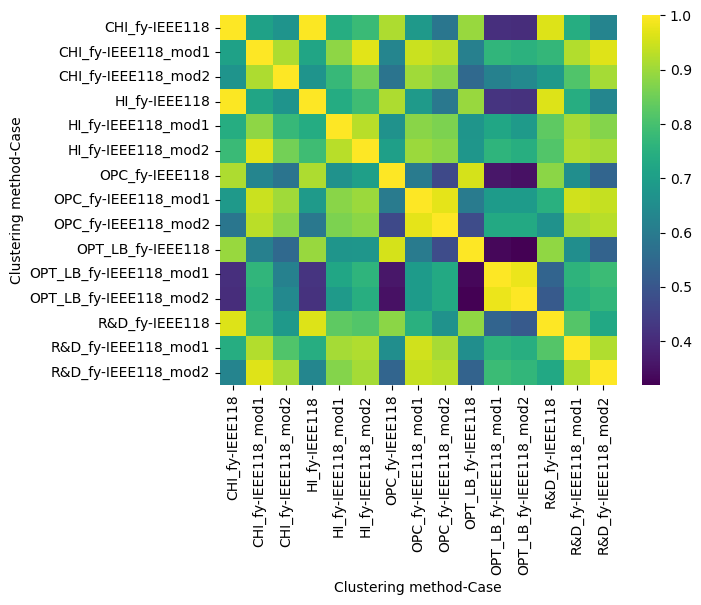

In [15]:
sns.heatmap(data = df_pivot.corr(),cmap = "viridis")

<Axes: xlabel='Clustering method-Case', ylabel='Clustering method-Case'>

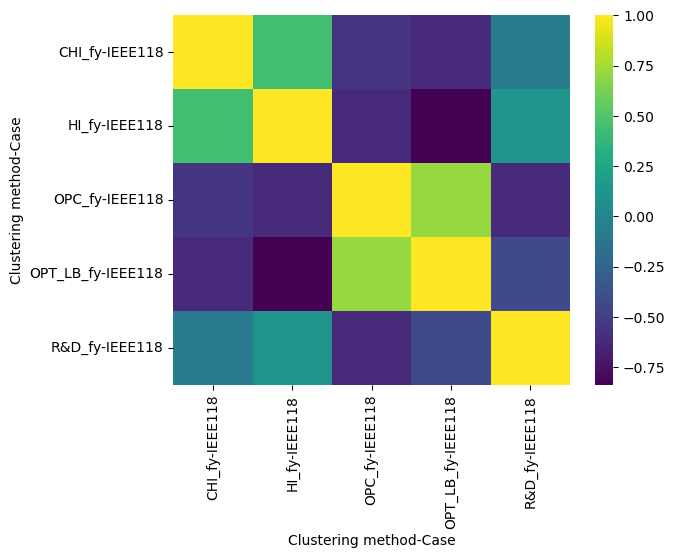

In [91]:
sns.heatmap(data = df_centered.corr(),cmap = "viridis")